In [103]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [104]:
df_ipc=pd.read_csv("Data/FewsNetPopulation/ethiopia_admin1_fewsnet_population_20090701_20200801.csv",index_col=0)
df_ipc.date=pd.to_datetime(df_ipc.date)

In [105]:
bla=pd.read_csv("Data/FewsNetAdmin2/ethiopia_admin2_fewsnet_20090701_20200801_CS.csv")

In [106]:
bla.date.unique()

array(['2009-07-01', '2009-10-01', '2010-01-01', '2010-04-01',
       '2010-07-01', '2010-10-01', '2011-01-01', '2011-04-01',
       '2011-07-01', '2011-10-01', '2012-01-01', '2012-04-01',
       '2012-07-01', '2012-10-01', '2013-01-01', '2013-04-01',
       '2013-07-01', '2013-10-01', '2014-01-01', '2014-04-01',
       '2014-07-01', '2014-10-01', '2015-01-01', '2015-04-01',
       '2015-07-01', '2015-10-01', '2016-02-01', '2016-06-01',
       '2016-10-01', '2017-02-01', '2017-06-01', '2017-10-01',
       '2018-02-01', '2018-06-01', '2018-10-01', '2019-02-01',
       '2019-06-01', '2019-10-01', '2020-02-01', '2020-06-01',
       '2020-08-01'], dtype=object)

In [107]:
df_ipc.date.unique()

array(['2009-07-01T00:00:00.000000000', '2009-10-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000',
       '2010-07-01T00:00:00.000000000', '2010-10-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2011-04-01T00:00:00.000000000',
       '2011-07-01T00:00:00.000000000', '2011-10-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2012-04-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2013-07-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-07-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-07-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2016-02-01T00:00:00.000000000', '2016-06-01

In [108]:
df_ipc["CS_12"]=df_ipc["CS_1"]+df_ipc["CS_2"]

In [109]:
#done now cause 2020-08 contains only predictions so bit confusing. But in future should be removed
df_ipc=df_ipc[df_ipc.date<="2020-06"]

In [110]:
#calculate percentage of population per status and level
for status in ["CS","ML1","ML2"]:
    for i in range(1,6):
        c=f"{status}_{i}"
        df_ipc[f"perc_{c}"]=df_ipc[c]/df_ipc[f"pop_{status}"]*100

In [111]:
df_nat=df_ipc.groupby("date",as_index=False).sum()
#to make the plotting code work
df_nat["ADM1_EN"]="Ethiopia"

### Missing data

In [112]:
print("Number of date-admin1 combinations with no IPC CS data:", len(df_ipc[df_ipc.adjusted_population==0]))

Number of date-admin1 combinations with no IPC CS data: 0


In [113]:
print("Percentage of missing data:",len(df_ipc[df_ipc.adjusted_population==0])/len(df_ipc)*100)

Percentage of missing data: 0.0


### IPC levels

In [114]:
def plot_ipclevels(df,adm1c="ADM1_EN"):
    color_map = {1:'#C9E1C5', 2:'#F2E65D', 3:'#DD8236', 4:'#BD3430', 5:'#551010', 99: '#CCCCCC'}
    
    width = 75
    count = 1
    fig, ax = plt.subplots(figsize=(20,30))
    for region in df[adm1c].unique():
        ax = plt.subplot(6,2,count)
        data = df.loc[df[adm1c]==region]

        p4 = plt.bar(data['date'], data['CS_5'], width=width, color=color_map[5],label="IPC 5")
        p4 = plt.bar(data['date'], data['CS_4'], width=width, color=color_map[4],label="IPC 4")
        p3 = plt.bar(data['date'], data['CS_3'], width=width, color=color_map[3], bottom=(data['CS_4']+data['CS_5']).to_numpy(),label="IPC 3")
        p2 = plt.bar(data['date'], data['CS_12'], width=width, color=color_map[1], bottom=(data['CS_3']+data['CS_4']+data['CS_5']).to_numpy(),label="IPC 1 and 2")
        data_miss=data.replace(np.nan,0)
        data_miss["miss"]=data_miss["adjusted_population"]-(data_miss["pop_CS"].replace(np.nan,0))

        plt.title(region)
        ax.legend(bbox_to_anchor=(1.04, 1),frameon=False)

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        ax.set_xticks(data.date.values,minor=True)
        ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        count+=1
    fig.tight_layout(pad=3.0)
    

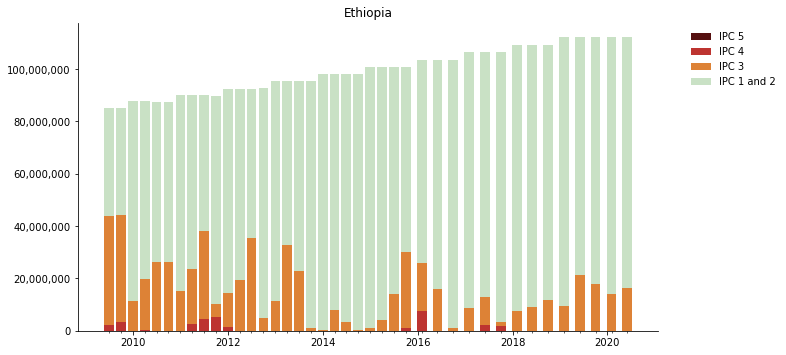

In [115]:
plot_ipclevels(df_nat)

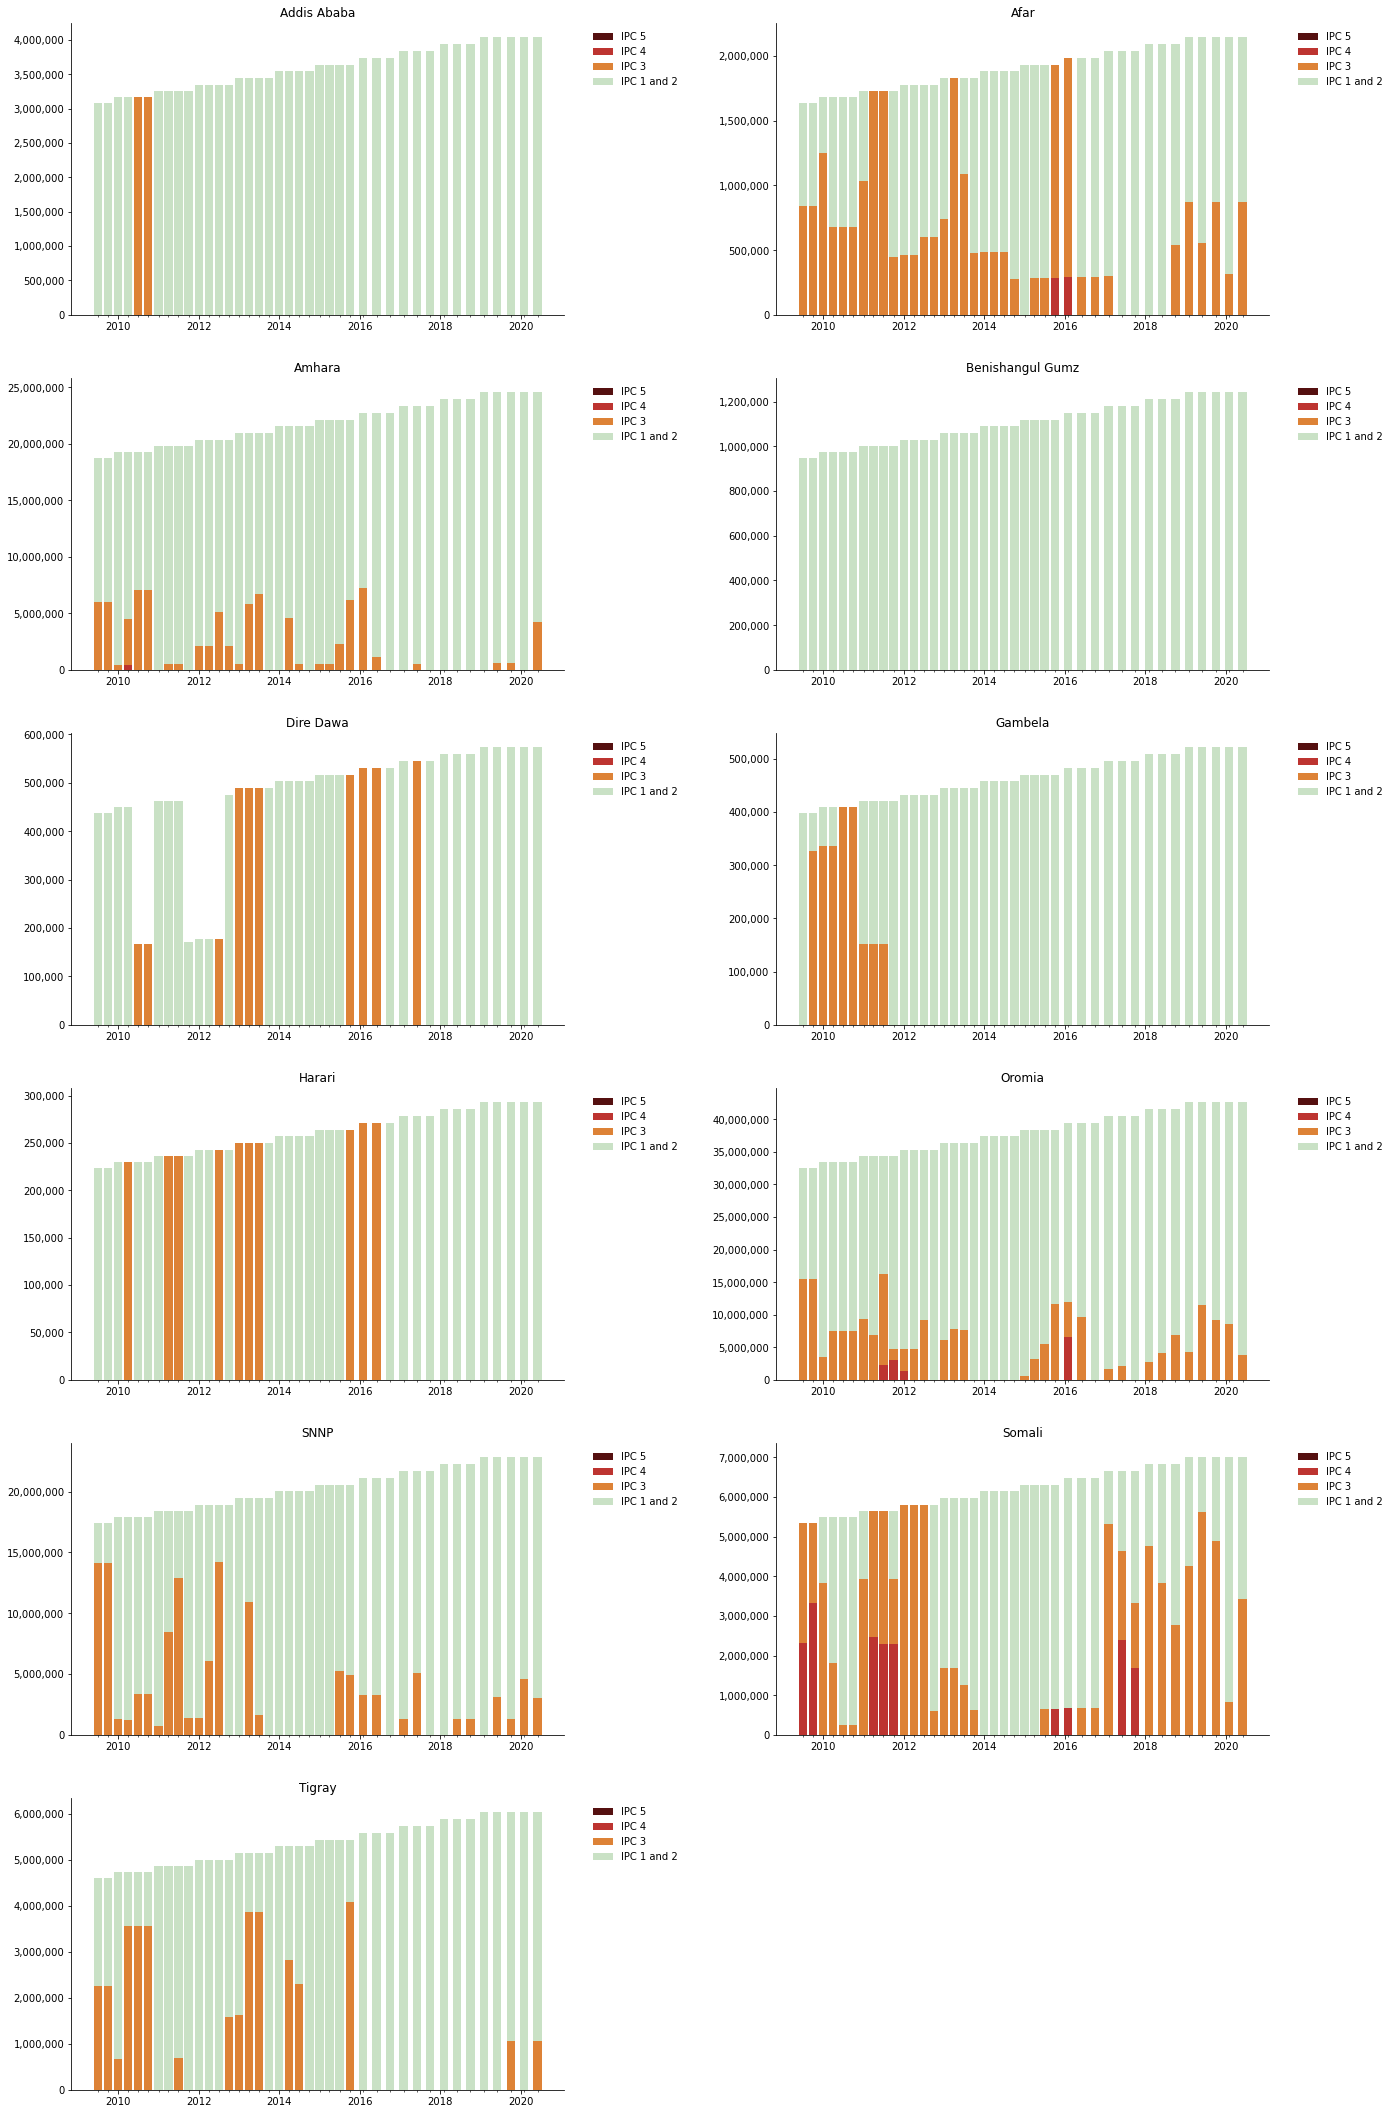

In [116]:
plot_ipclevels(df_ipc)

### Actual value (CS) versus forecasted values (ML1 and ML2)

In [117]:
#calculate percentage of population per status and level
for status in ["CS","ML1","ML2"]:
    for i in range(1,6):
        c=f"{status}_{i}"
        df_nat[f"perc_{c}"]=df_nat[c]/df_nat[f"pop_{status}"]*100
    df_nat[f"{status}_3p"]=df_nat[f"{status}_3"]+df_nat[f"{status}_4"]+df_nat[f"{status}_5"]
    df_nat[f"perc_{status}_3p"]=df_nat[f"{status}_3p"]/df_nat[f"pop_{status}"]*100

In [118]:
for status in ["CS","ML1","ML2"]:
    for i in range(1,6):
        c=f"{status}_{i}"
        df_ipc[f"perc_{c}"]=df_ipc[c]/df_ipc[f"pop_{status}"]*100
    df_ipc[f"{status}_3p"]=df_ipc[f"{status}_3"]+df_ipc[f"{status}_4"]+df_ipc[f"{status}_5"]
    df_ipc[f"perc_{status}_3p"]=df_ipc[f"{status}_3p"]/df_ipc[f"pop_{status}"]*100

In [119]:
def get_projection(row, df):
    df['date'] = pd.to_datetime(df['date'])
    possible_dates = [row['offset_1'], row['offset_2'], row['offset_3']]
    try:
        actual = df.loc[(df['ADM1_EN']==row['ADM1_EN'])&(df['date']).isin(possible_dates)]
#         print(actual)
#         print(len(actual[['ML1_1',"ML1_2","ML1_3","ML1_4","ML1_5"]].values[0]))
        return actual[['ML1_1',"ML1_2","ML1_3","ML1_4","ML1_5"]].values[0]
    except:
        return None

In [120]:

# df_ipc[['pre_value',"pre_value2"]] = df_ipc.groupby('ADM1_EN')['ML1_1',"ML1_2"].shift(1)
# df_ipc['pre_value'] = df_ipc.pre_value.where(df_ipc.groupby('ADM1_EN').date.diff().dt.days <= 130, np.nan)
# # df

In [121]:
# df_ipc['offset_1'] = df_ipc['date'] - pd.DateOffset(months=2)
# df_ipc['offset_2'] = df_ipc['date'] - pd.DateOffset(months=3)
# df_ipc['offset_3'] = df_ipc['date'] - pd.DateOffset(months=4)

In [122]:
# df_ipc[[f"{c}_next" for c in ["ML1_1","ML1_2","ML1_3","ML1_4","ML1_5"]]] = df_ipc.apply(lambda x: get_projection(x, df_ipc), axis=1)

In [123]:
#set the forecasted ML1 and ML2 values for the connected date
#now assumed ML1 is always forecasted for the next date in the df. This can be too simplified, in 'old stuff' is a start to do this more correctly
#(optimally the dates for which forecasts were produced would already be included in the df from the start)
df_nat[[f"{c}_next" for c in ["date","ML1_1","ML1_2","ML1_3","ML1_4","ML1_5","ML1_3p"]]]=df_nat[["date","ML1_1","ML1_2","ML1_3","ML1_4","ML1_5","ML1_3p"]].shift(1)
df_nat[[f"{c}_next2" for c in ["date","ML2_1","ML2_2","ML2_3","ML2_4","ML2_5","ML2_3p"]]]=df_nat[["date","ML2_1","ML2_2","ML2_3","ML2_4","ML2_5","ML2_3p"]].shift(2)
df_nat[[f"{c}_next" for c in ["date","perc_ML1_1","perc_ML1_2","perc_ML1_3","perc_ML1_4","perc_ML1_5","perc_ML1_3p"]]]=df_nat[["date","perc_ML1_1","perc_ML1_2","perc_ML1_3","perc_ML1_4","perc_ML1_5","perc_ML1_3p"]].shift(1)
df_nat[[f"{c}_next2" for c in ["date","perc_ML2_1","perc_ML2_2","perc_ML2_3","perc_ML2_4","perc_ML2_5","perc_ML2_3p"]]]=df_nat[["date","perc_ML2_1","perc_ML2_2","perc_ML2_3","perc_ML2_4","perc_ML2_5","perc_ML2_3p"]].shift(2)

In [124]:
from datetime import timedelta

In [126]:
for i in [f"{c}_next" for c in ["ML1_1","ML1_2","ML1_3","ML1_4","ML1_5","ML1_3p"]]+[f"{c}_next" for c in ["perc_ML1_1","perc_ML1_2","perc_ML1_3","perc_ML1_4","perc_ML1_5","perc_ML1_3p"]]:
    df_nat[i] = df_nat[i].where(df_nat.groupby('ADM1_EN').date.diff().dt.days <= 130, np.nan)
    df_nat[i] = df_nat[i].where((df_nat.date - df_nat.date_next) <= timedelta(130), np.nan)

#this is not completely correct... only working for shift 1..
for i in [f"{c}_next2" for c in ["ML2_1","ML2_2","ML2_3","ML2_4","ML2_5","ML2_3p"]]+[f"{c}_next2" for c in ["perc_ML2_1","perc_ML2_2","perc_ML2_3","perc_ML2_4","perc_ML2_5","perc_ML2_3p"]]:
#     df_nat[i] = df_nat[i].where(df_nat.groupby('ADM1_EN').date_next2.diff().dt.days <= 250, np.nan)
    df_nat[i] = df_nat[i].where((df_nat.date - df_nat.date_next2) <= timedelta(250), np.nan)

In [127]:
# for a in df_ipc.ADM1_EN.unique():
#     print(a)
#     print(df_ipc.loc[df_ipc.ADM1_EN==a].shift(1))
    
    
df_ipc[[f"{c}_next" for c in ["date","ML1_1","ML1_2","ML1_3","ML1_4","ML1_5","ML1_3p"]]]=df_ipc.groupby("ADM1_EN")["date","ML1_1","ML1_2","ML1_3","ML1_4","ML1_5","ML1_3p"].shift(1)
df_ipc[[f"{c}_next2" for c in ["date","ML2_1","ML2_2","ML2_3","ML2_4","ML2_5","ML2_3p"]]]=df_ipc.groupby("ADM1_EN")["date","ML2_1","ML2_2","ML2_3","ML2_4","ML2_5","ML2_3p"].shift(2)
df_ipc[[f"{c}_next" for c in ["date","perc_ML1_1","perc_ML1_2","perc_ML1_3","perc_ML1_4","perc_ML1_5","perc_ML1_3p"]]]=df_ipc.groupby("ADM1_EN")["date","perc_ML1_1","perc_ML1_2","perc_ML1_3","perc_ML1_4","perc_ML1_5","perc_ML1_3p"].shift(1)
df_ipc[[f"{c}_next2" for c in ["date","perc_ML2_1","perc_ML2_2","perc_ML2_3","perc_ML2_4","perc_ML2_5","perc_ML2_3p"]]]=df_ipc.groupby("ADM1_EN")["date","perc_ML2_1","perc_ML2_2","perc_ML2_3","perc_ML2_4","perc_ML2_5","perc_ML2_3p"].shift(2)
#     df_ipc.loc[(df_ipc.ADM1_EN==a),[f"{c}_next2" for c in ["date","ML2_1","ML2_2","ML2_3","ML2_4","ML2_5"]]]=df_ipc.loc[(df_ipc.ADM1_EN==a),["date","ML2_1","ML2_2","ML2_3","ML2_4","ML2_5"]].shift(2)
#     df_ipc.loc[(df_ipc.ADM1_EN==a),[f"{c}_next" for c in ["date","perc_ML1_1","perc_ML1_2","perc_ML1_3","perc_ML1_4","perc_ML1_5"]]]=df_ipc.loc[(df_ipc.ADM1_EN==a),["date","perc_ML1_1","perc_ML1_2","perc_ML1_3","perc_ML1_4","perc_ML1_5"]].shift(1)
#     df_ipc.loc[(df_ipc.ADM1_EN==a),[f"{c}_next2" for c in ["date","perc_ML2_1","perc_ML2_2","perc_ML2_3","perc_ML2_4","perc_ML2_5"]]]=df_ipc.loc[(df_ipc.ADM1_EN==a),["date","perc_ML2_1","perc_ML2_2","perc_ML2_3","perc_ML2_4","perc_ML2_5"]].shift(2)

<ipython-input-127-afa339e8f86c>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ipc[[f"{c}_next" for c in ["date","ML1_1","ML1_2","ML1_3","ML1_4","ML1_5","ML1_3p"]]]=df_ipc.groupby("ADM1_EN")["date","ML1_1","ML1_2","ML1_3","ML1_4","ML1_5","ML1_3p"].shift(1)
<ipython-input-127-afa339e8f86c>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ipc[[f"{c}_next2" for c in ["date","ML2_1","ML2_2","ML2_3","ML2_4","ML2_5","ML2_3p"]]]=df_ipc.groupby("ADM1_EN")["date","ML2_1","ML2_2","ML2_3","ML2_4","ML2_5","ML2_3p"].shift(2)
<ipython-input-127-afa339e8f86c>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ipc[[f"{c}_next" for c in ["date","perc_ML1_1","perc_ML1_2","perc_ML1_3","perc_ML1_4","perc_ML1_5","perc_ML1_3p"]]]=df_ipc.groupby("ADM1_EN")["da

In [128]:
for i in [f"{c}_next" for c in ["ML1_1","ML1_2","ML1_3","ML1_4","ML1_5","ML1_3p"]]+[f"{c}_next" for c in ["perc_ML1_1","perc_ML1_2","perc_ML1_3","perc_ML1_4","perc_ML1_5","perc_ML1_3p"]]:
#     df_ipc[i] = df_ipc[i].where(df_ipc.groupby('ADM1_EN').date.diff().dt.days <= 130, np.nan)
    df_ipc[i] = df_ipc[i].where((df_ipc.date - df_ipc.date_next) <= timedelta(130), np.nan)
for i in [f"{c}_next2" for c in ["ML2_1","ML2_2","ML2_3","ML2_4","ML2_5","ML2_3p"]]+[f"{c}_next2" for c in ["perc_ML2_1","perc_ML2_2","perc_ML2_3","perc_ML2_4","perc_ML2_5","perc_ML2_3p"]]:
#     df_ipc[i] = df_ipc[i].where(df_ipc.groupby('ADM1_EN').date.diff().dt.days <= 250, np.nan)
    df_ipc[i] = df_ipc[i].where((df_ipc.date - df_ipc.date_next2) <= timedelta(250), np.nan)

In [140]:
def plot_preds(df,adm1c="ADM1_EN"):
    color_map = {1:'#C9E1C5', 2:'#F2E65D', 3:'#DD8236', 4:'#BD3430', 5:'#551010', 99: '#CCCCCC'}
    
    width = 75
    count = 1
    fig, ax = plt.subplots(figsize=(20,30))
  
    for region in df[adm1c].unique():
        ax = plt.subplot(6,2,count)
        data = df.loc[df[adm1c]==region]
#         plt.plot(data['date'], data['perc_CS_3'], label='CS',
#                          alpha=0.75, color='#E6B655', linestyle='-', linewidth=4)
#         plt.plot(data['date'], data['perc_ML1_3_next'], color='#388c50',
#                          label='ML1', linestyle=':', linewidth=2)
#         plt.plot(data['date'], data['perc_ML2_3_next2'], color='#c24e2d',
#                          label='ML2', linestyle='-.', linewidth=2)
        plt.plot(data['date'], data['perc_CS_3p'], label='CS',
                         alpha=0.75, color='#E6B655', linestyle='-', linewidth=4)
        plt.plot(data['date'], data['perc_ML1_3p_next'], color='#388c50',
                         label='ML1', linestyle=':', linewidth=2)
        plt.plot(data['date'], data['perc_ML2_3p_next2'], color='#c24e2d',
                         label='ML2', linestyle='-.', linewidth=2)
        # plt.plot(df_nat['date'], df_nat['CS_4'], label='IPC 4',
        #                  alpha=0.75, color='#CA7E8D', linestyle='-', linewidth=4)
        # plt.plot(df_nat['date'], df_nat['ML1_4_next'], color='#CA7E8D',
        #                  label='Projected', linestyle=':', linewidth=2)
        # plt.plot(somalia_ipc['period'], somalia_ipc['IPC5-pop'], label='IPC 5',
        #                  alpha=0.75, color='#9E6B55', linestyle='-', linewidth=4)
        # plt.plot(somalia_ipc['P-end-period'], somalia_ipc['P-IPC5-pop'], color='#9E6B55',
        #                  label='Projected', linestyle=':', linewidth=2)
        plt.title(f"{region} IPC 3+")
        ax.legend(bbox_to_anchor=(1.04, 1),frameon=False,title="Legend")

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_xlabel("Date")
        ax.set_ylabel("Percentage of population")
        ax.set_xticks(data.date.values,minor=True)
        ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        count+=1
    fig.tight_layout(pad=3.0)
    

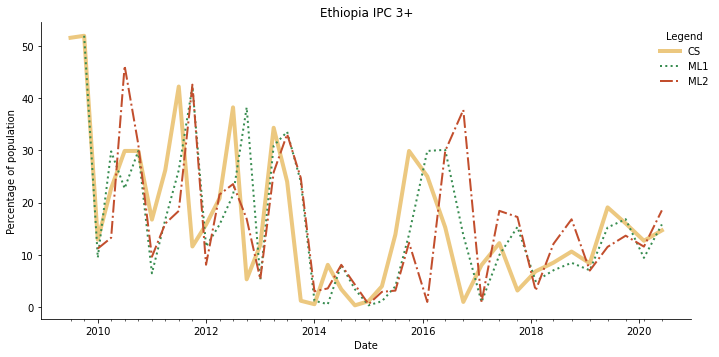

In [142]:
plot_preds(df_nat)

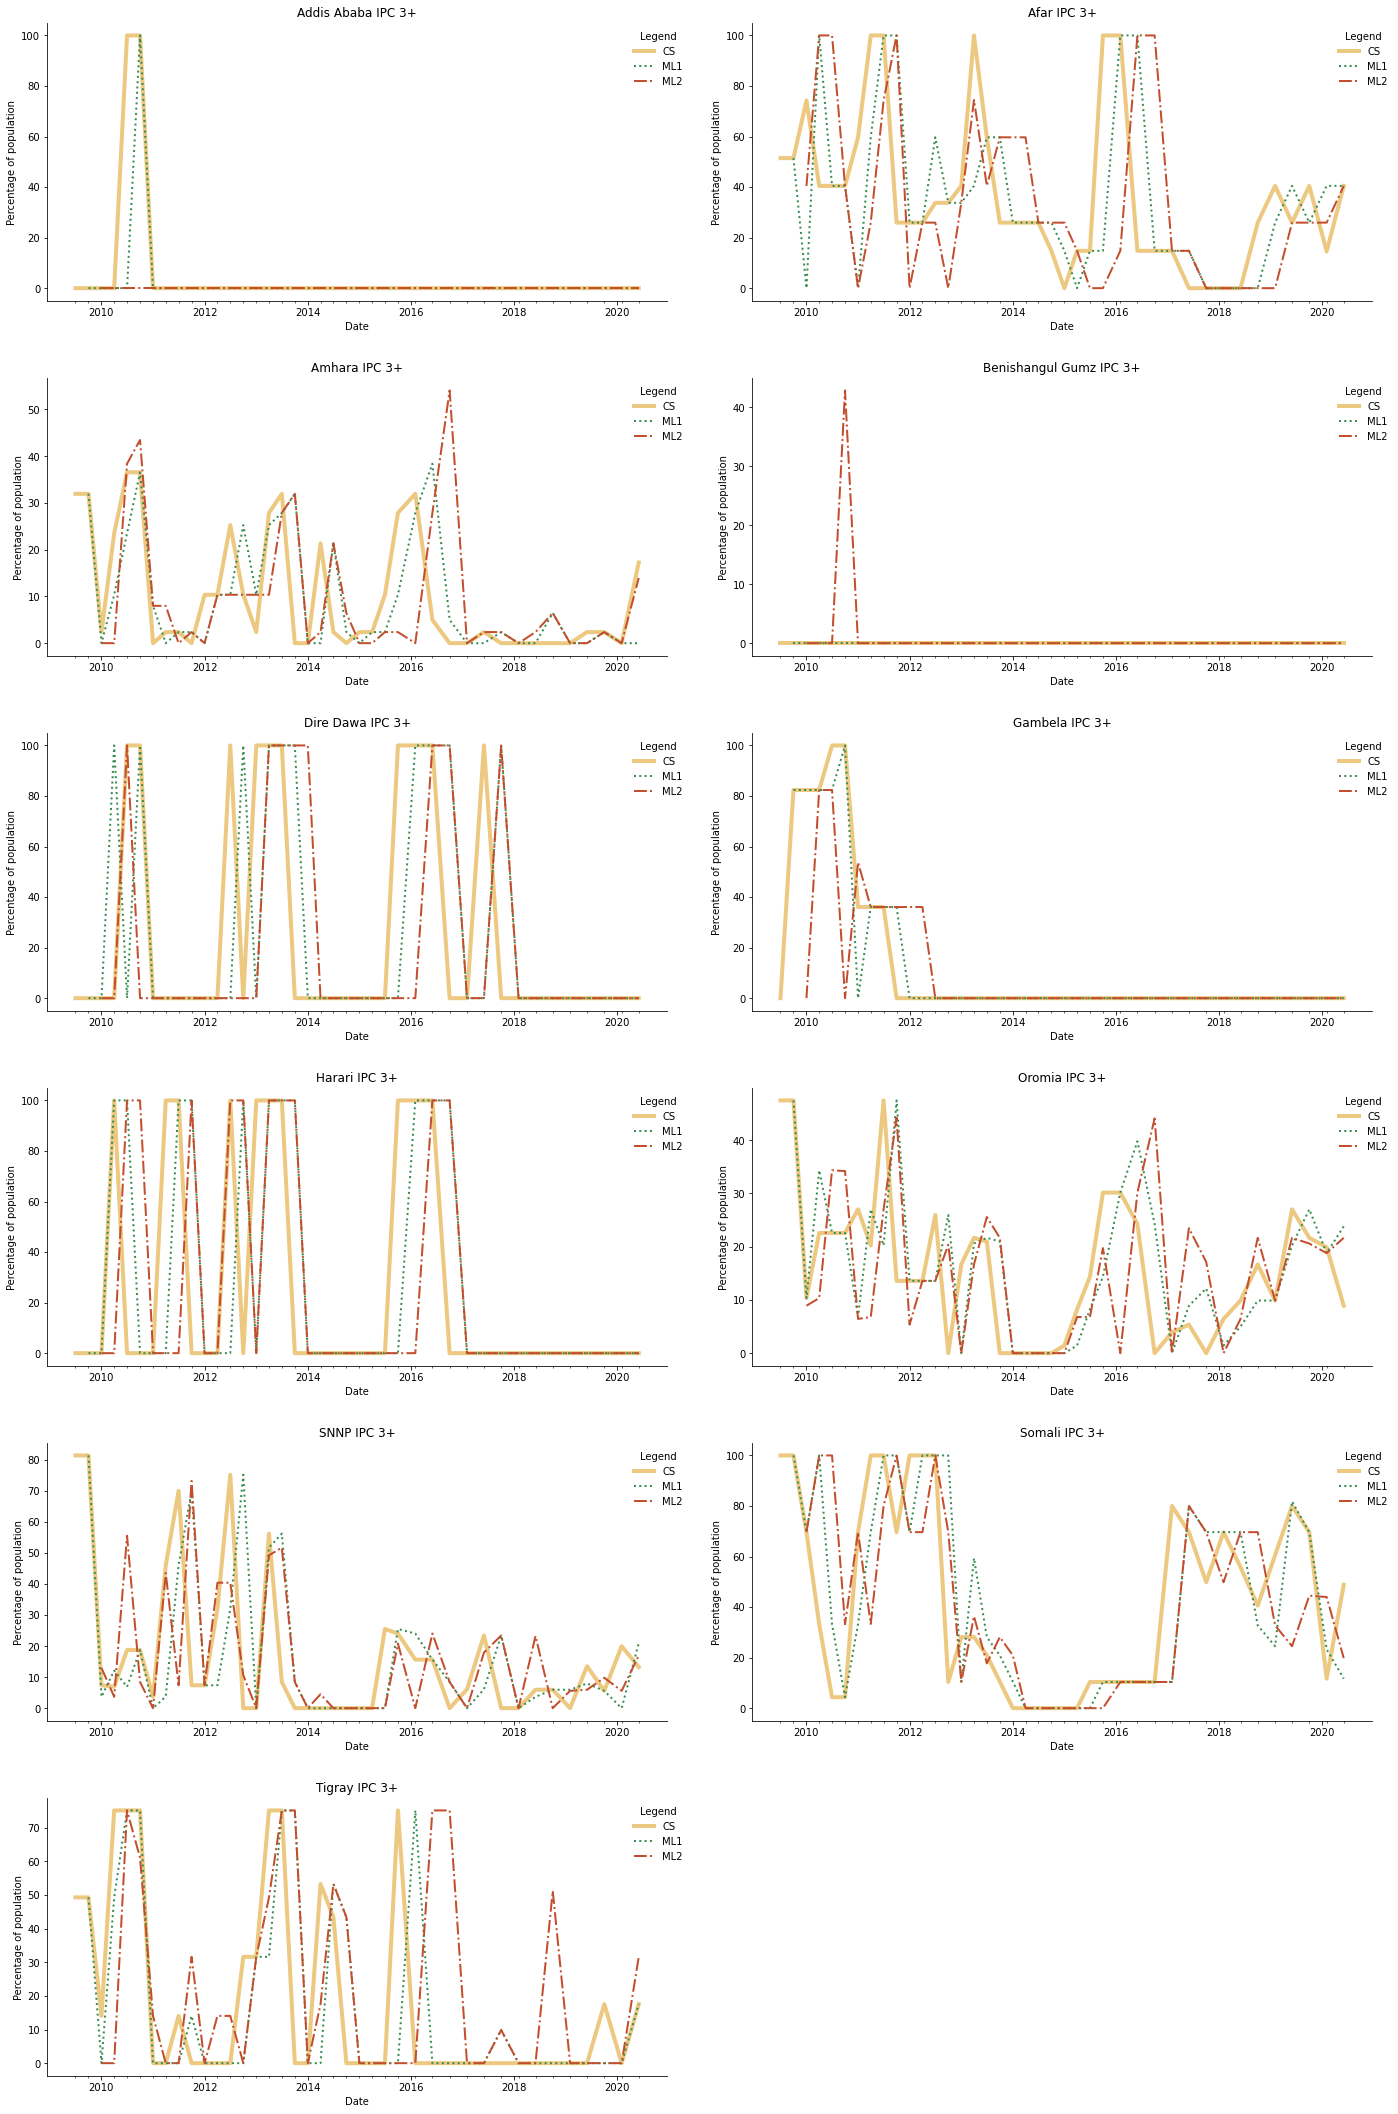

In [143]:
plot_preds(df_ipc)

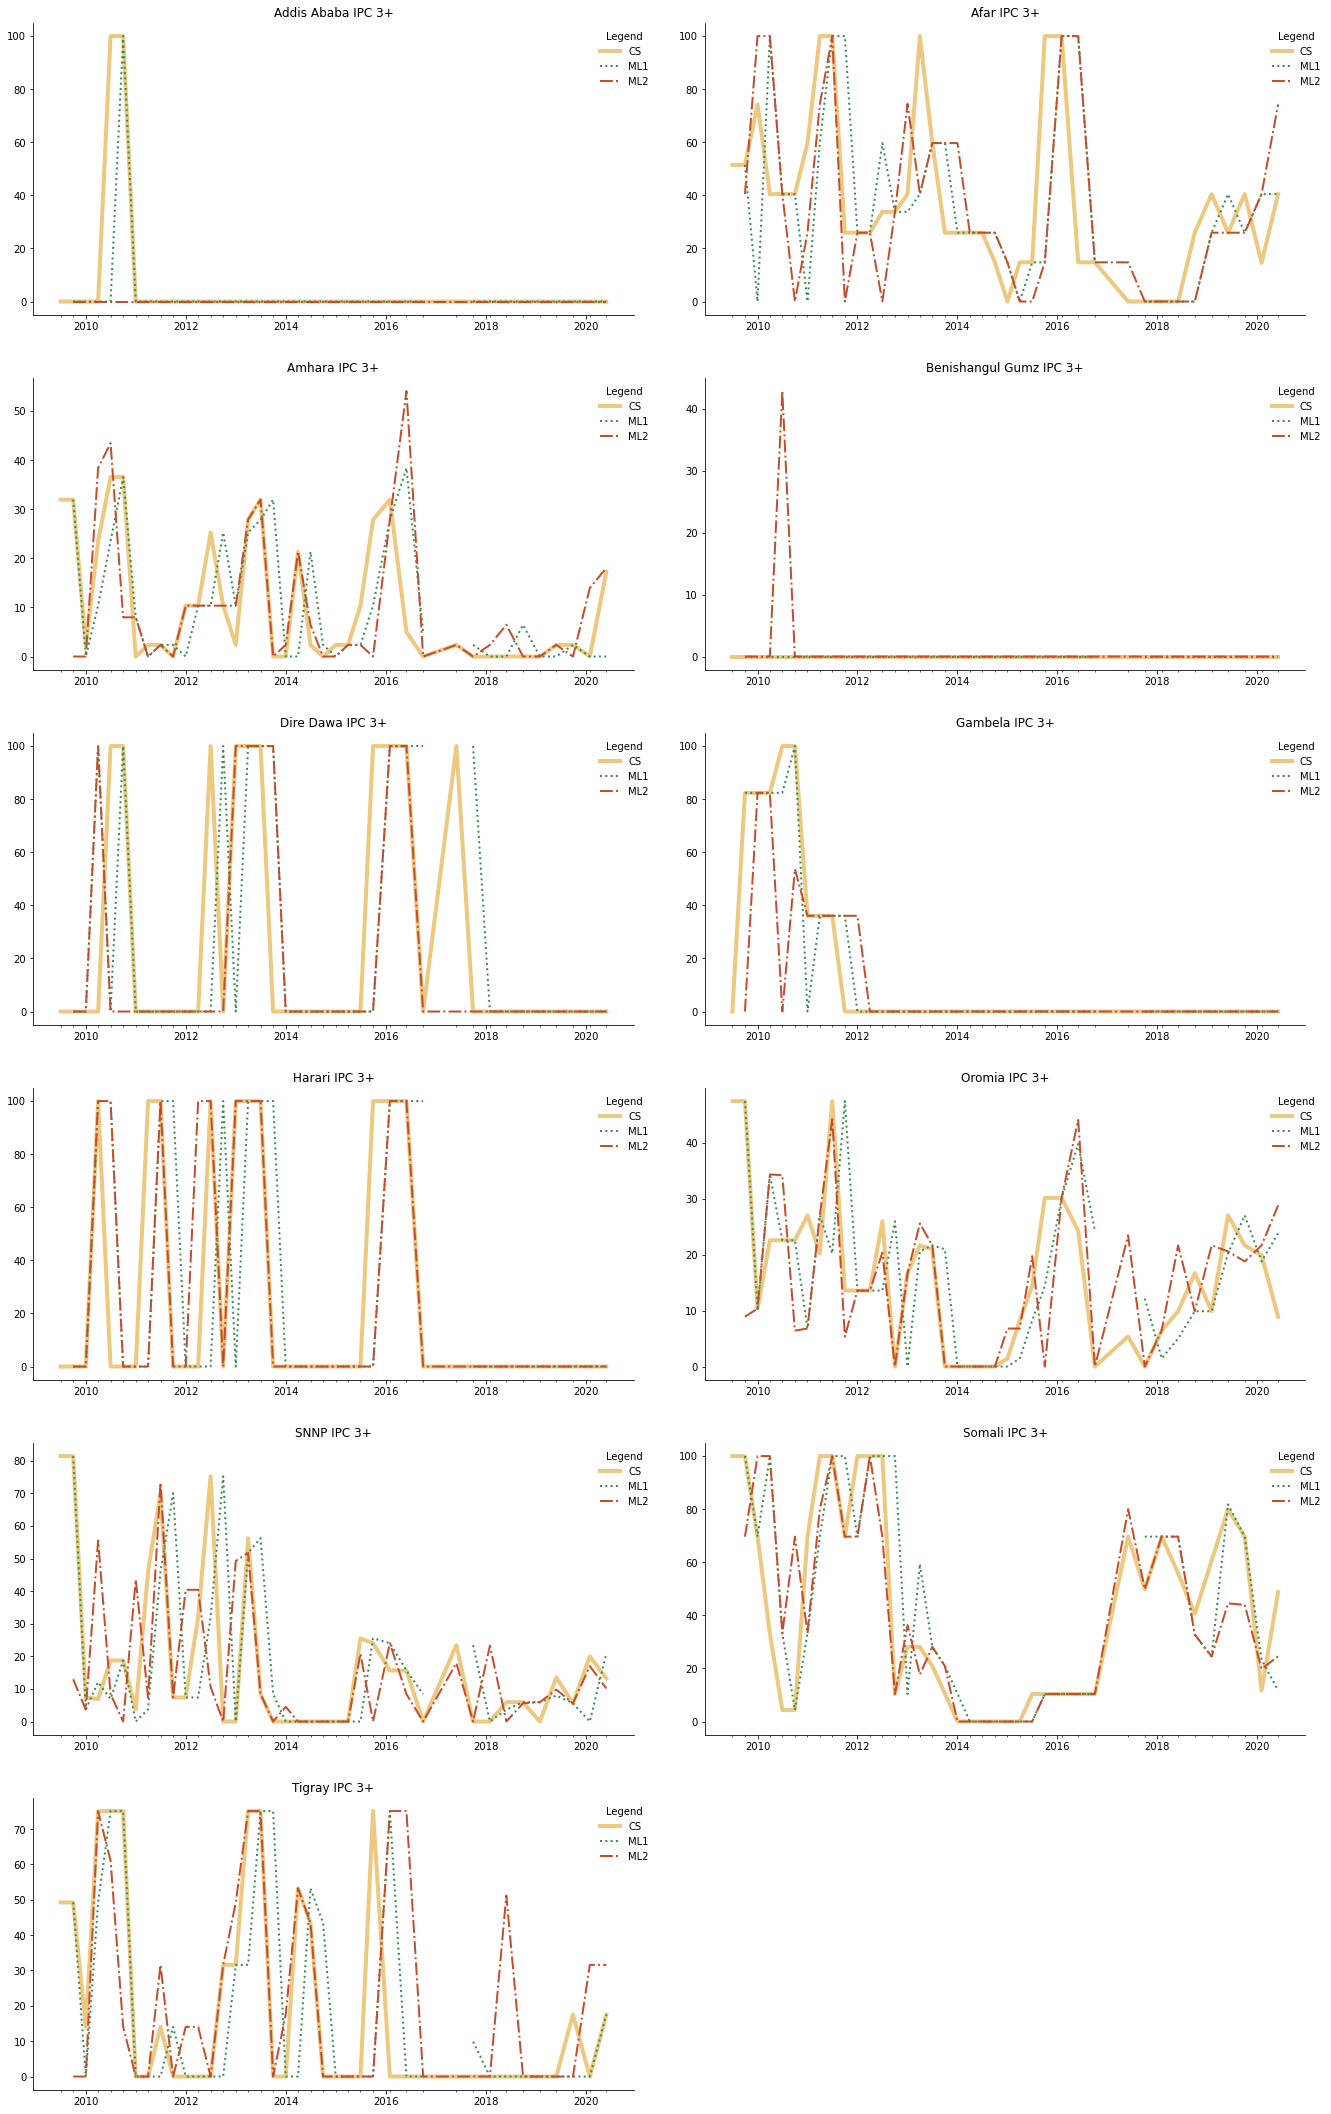

In [29]:
plot_preds(df_ipc)

In [144]:
def plot_preds_nodelay(df,adm1c="ADM1_EN"):
    color_map = {1:'#C9E1C5', 2:'#F2E65D', 3:'#DD8236', 4:'#BD3430', 5:'#551010', 99: '#CCCCCC'}
    
    width = 75
    count = 1
    fig, ax = plt.subplots(figsize=(20,30))
  
    for region in df[adm1c].unique():
        ax = plt.subplot(6,2,count)
        data = df.loc[df[adm1c]==region]
#         plt.plot(data['date'], data['perc_CS_3'], label='CS',
#                          alpha=0.75, color='#E6B655', linestyle='-', linewidth=4)
#         plt.plot(data['date'], data['perc_ML1_3_next'], color='#388c50',
#                          label='ML1', linestyle=':', linewidth=2)
#         plt.plot(data['date'], data['perc_ML2_3_next2'], color='#c24e2d',
#                          label='ML2', linestyle='-.', linewidth=2)
        plt.plot(data['date'], data['perc_CS_3p'], label='CS',
                         alpha=0.75, color='#E6B655', linestyle='-', linewidth=4)
        plt.plot(data['date'], data['perc_ML1_3p'], color='#388c50',
                         label='ML1', linestyle=':', linewidth=2)
        plt.plot(data['date'], data['perc_ML2_3p'], color='#c24e2d',
                         label='ML2', linestyle='-.', linewidth=2)
        # plt.plot(df_nat['date'], df_nat['CS_4'], label='IPC 4',
        #                  alpha=0.75, color='#CA7E8D', linestyle='-', linewidth=4)
        # plt.plot(df_nat['date'], df_nat['ML1_4_next'], color='#CA7E8D',
        #                  label='Projected', linestyle=':', linewidth=2)
        # plt.plot(somalia_ipc['period'], somalia_ipc['IPC5-pop'], label='IPC 5',
        #                  alpha=0.75, color='#9E6B55', linestyle='-', linewidth=4)
        # plt.plot(somalia_ipc['P-end-period'], somalia_ipc['P-IPC5-pop'], color='#9E6B55',
        #                  label='Projected', linestyle=':', linewidth=2)
        plt.title(f"NO DELAY! {region} IPC 3+")
        ax.legend(bbox_to_anchor=(1.04, 1),frameon=False,title="Legend")

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        ax.set_xticks(data.date.values,minor=True)
        ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        count+=1
    fig.tight_layout(pad=3.0)
    

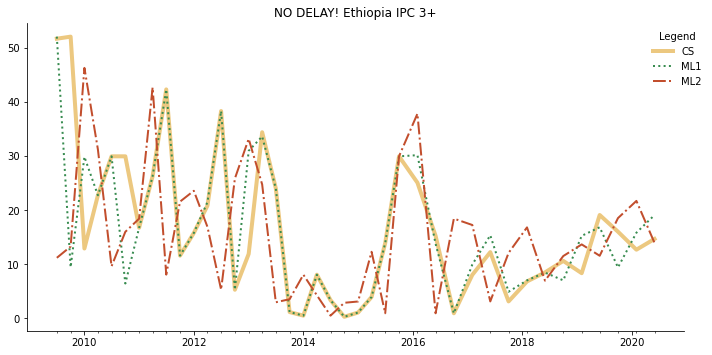

In [145]:
plot_preds_nodelay(df_nat)

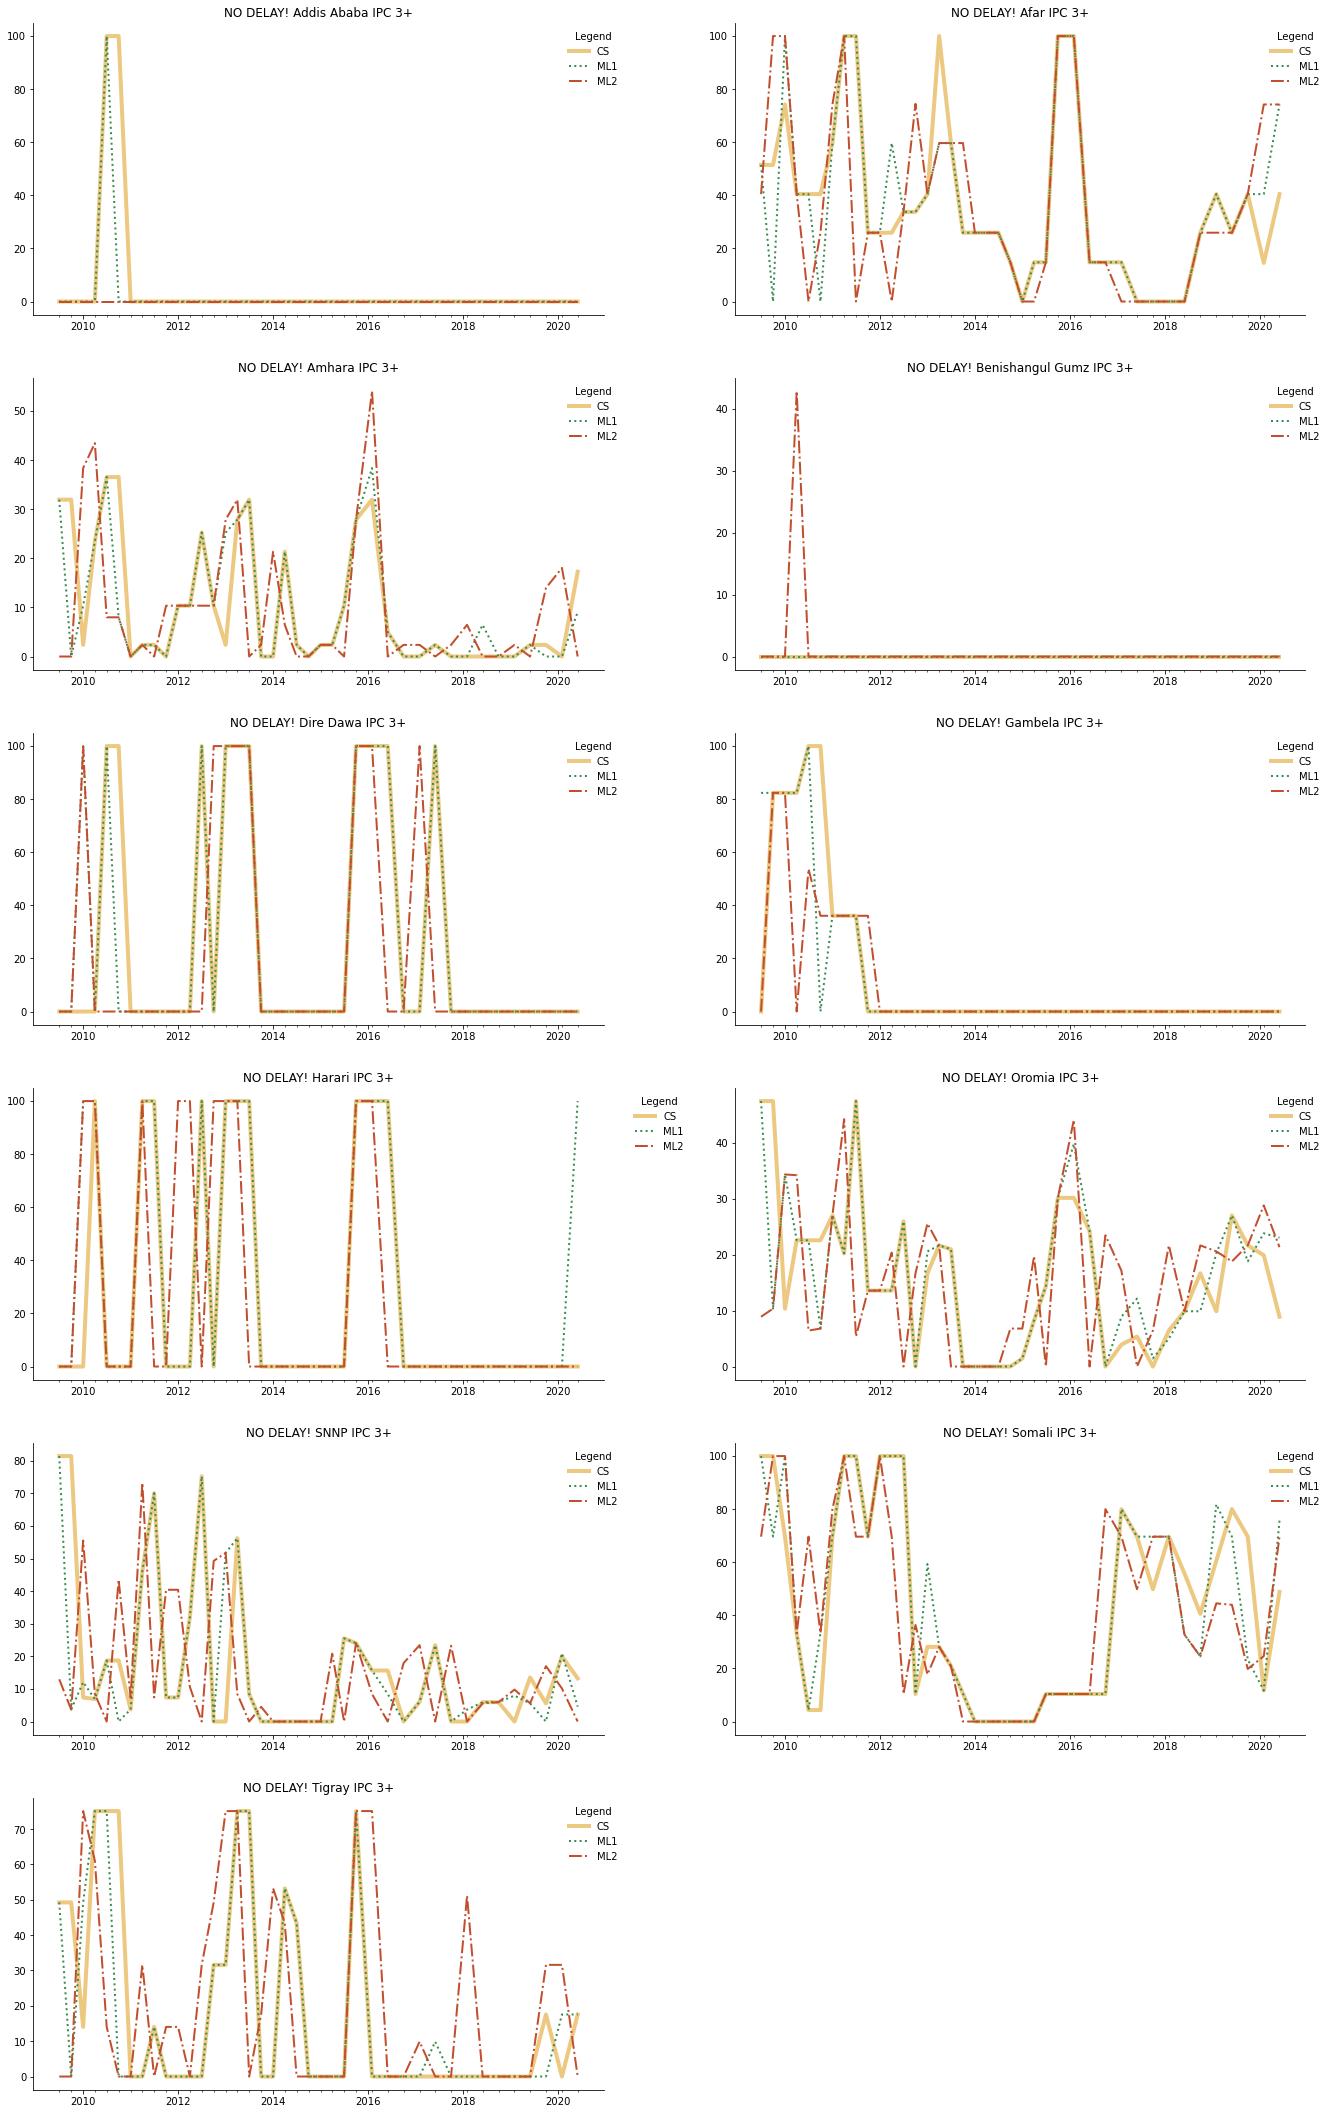

In [146]:
plot_preds_nodelay(df_ipc)

In [155]:
df_ipcn=df_ipc.dropna()
accuracy_score(df_ipcn.CS_3,df_ipcn.ML1_3_next)

0.583732057416268

In [46]:
df_ipcn[["date","ADM1_EN","perc_CS_3","perc_ML1_3_next","perc_ML1_3"]]

date           ADM1_EN  perc_CS_3  perc_ML1_3_next  perc_ML1_3
2   2009-07-01            Amhara  31.956630        51.460479   31.956630
3   2009-07-01  Benishangul Gumz   0.000000        31.956630    0.000000
4   2009-07-01         Dire Dawa   0.000000         0.000000    0.000000
5   2009-07-01           Gambela   0.000000         0.000000   82.365823
6   2009-07-01            Harari   0.000000        82.365823    0.000000
..         ...               ...        ...              ...         ...
424 2020-06-01            Harari   0.000000         0.000000  100.000000
425 2020-06-01            Oromia   8.905066       100.000000   23.038542
426 2020-06-01              SNNP  13.227755        23.038542    4.565580
427 2020-06-01            Somali  48.799613         4.565580   75.683580
428 2020-06-01            Tigray  17.547501        75.683580   17.547501

[427 rows x 5 columns]

In [61]:
df_ipc[(df_ipc.ADM1_EN=="Addis Ababa")&(df_ipc.ML1_3_next>0)]

date      ADM1_EN    Total  adjusted_population       CS_1  CS_2  \
11  2009-10-01  Addis Ababa  3585647              3077903  3077903.0   0.0   
33  2010-04-01  Addis Ababa  3585647              3164789  3164789.0   0.0   
44  2010-07-01  Addis Ababa  3585647              3164789        0.0   0.0   
55  2010-10-01  Addis Ababa  3585647              3164789        0.0   0.0   
99  2011-10-01  Addis Ababa  3585647              3255065  3255065.0   0.0   
154 2013-01-01  Addis Ababa  3585647              3444500  3444500.0   0.0   
165 2013-04-01  Addis Ababa  3585647              3444500  3444500.0   0.0   
176 2013-07-01  Addis Ababa  3585647              3444500  3444500.0   0.0   
187 2013-10-01  Addis Ababa  3585647              3444500  3444500.0   0.0   
220 2014-07-01  Addis Ababa  3585647              3542306  3542306.0   0.0   
231 2014-10-01  Addis Ababa  3585647              3542306  3542306.0   0.0   
286 2016-02-01  Addis Ababa  3585647              3741252  3741252.0   0.0   
330 2017-10-01  Addis Ababa  3585647              3842238  3842238.0   0.0   
418 2020-06-01  Addis Ababa  3585647              4047303  4047303.0   0.0   

          CS_3  CS_4  CS_5      ML1_1  ...  perc_ML1_1_next  perc_ML1_2_next  \
11         0.0   0.0   0.0  3077903.0  ...         8.223570        42.516995   
33         0.0   0.0   0.0  3164789.0  ...         8.223566        42.516991   
44   3164789.0   0.0   0.0        0.0  ...         8.223566        16.674079   
55   3164789.0   0.0   0.0  3164789.0  ...         8.223566        16.674079   
99         0.0   0.0   0.0  3255065.0  ...         8.223565        77.732806   
154        0.0   0.0   0.0  3444500.0  ...        24.897653        43.511238   
165        0.0   0.0   0.0  3444500.0  ...        24.897650        43.511218   
176        0.0   0.0   0.0  3444500.0  ...         8.223570        16.674080   
187        0.0   0.0   0.0  3444500.0  ...         8.223570        16.674080   
220        0.0   0.0   0.0  3542306.0  ...        24.897637        21.852327   
231        0.0   0.0   0.0  3542306.0  ...        24.897637        31.711950   
286        0.0   0.0   0.0  3741252.0  ...        24.897653         0.000000   
330        0.0   0.0   0.0  3842238.0  ...        24.897654        65.242721   
418        0.0   0.0   0.0  4047303.0  ...        58.549249        23.903250   

     perc_ML1_3_next  perc_ML1_4_next  perc_ML1_5_next  perc_ML2_1_next2  \
11         49.259436         0.000000              0.0               0.0   
33         35.215810        14.043633              0.0               0.0   
44         75.102355         0.000000              0.0               0.0   
55         75.102355         0.000000              0.0               0.0   
99         14.043629         0.000000              0.0               0.0   
154        31.591109         0.000000              0.0               0.0   
165        31.591132         0.000000              0.0               0.0   
176        75.102350         0.000000              0.0               0.0   
187        75.102350         0.000000              0.0               0.0   
220        53.250036         0.000000              0.0               0.0   
231        43.390414         0.000000              0.0               0.0   
286        75.102347         0.000000              0.0               0.0   
330         9.859625         0.000000              0.0               0.0   
418        17.547501         0.000000              0.0               0.0   

     perc_ML2_2_next2  perc_ML2_3_next2  perc_ML2_4_next2  perc_ML2_5_next2  
11          30.353880         26.014166         43.631955               0.0  
33           0.000000         89.636883         10.363117               0.0  
44          66.782910         33.217090          0.000000               0.0  
55          30.353873         69.646127          0.000000               0.0  
99          30.353883         69.646117          0.000000               0.0  
154         63.633943        

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
#read admin2 level data
df_adm2=pd.read_csv("Data/FewsNetPopulation/ethiopia_admin2_fewsnet_population_20090701_20200801.csv",index_col=0)

In [49]:
#add forecasted values to date they were forecasted for
for a in df_adm2.ADM1_EN.unique():
    for b in df_adm2.ADM2_EN.unique():
        df_adm2.loc[(df_adm2.ADM1_EN==a) & (df_adm2.ADM2_EN==b),f"ML1_next"]=df_adm2.loc[(df_adm2.ADM1_EN==a) & (df_adm2.ADM2_EN==b),"ML1"].shift(1).to_numpy()
        df_adm2.loc[(df_adm2.ADM1_EN==a) & (df_adm2.ADM2_EN==b),f"ML2_next2"]=df_adm2.loc[(df_adm2.ADM1_EN==a) & (df_adm2.ADM2_EN==b),"ML2"].shift(2).to_numpy()
        df_adm2.loc[(df_adm2.ADM1_EN==a) & (df_adm2.ADM2_EN==b),f"date_next"]=df_adm2.loc[(df_adm2.ADM1_EN==a) & (df_adm2.ADM2_EN==b),"date"].shift(1).to_numpy()

In [50]:
df_adm2["CS_3p"]=np.where(df_adm2.CS>=3,1,0)
df_adm2["ML1_next_3p"]=np.where(df_adm2.ML1_next>=3,1,0)
df_adm2["ML2_next2_3p"]=np.where(df_adm2.ML2_next2>=3,1,0)

In [51]:
df_adm2s=df_adm2.dropna()

In [55]:
df_adm2s.loc[(df_adm2s.ADM1_EN=="Addis Ababa") & (df_adm2s.ML1_next==3),["date","ADM1_EN","CS","ML1_next","ML1"]]

date      ADM1_EN   CS  ML1_next  ML1
526  2010-10-01  Addis Ababa  3.0       3.0  1.0

In [20]:
print("Accuracy of ML1 forecasts:",accuracy_score(df_adm2s.CS,df_adm2s.ML1_next))

Accuracy of ML1 forecasts: 0.7839953609741954


In [21]:
print("Accuracy of ML2 forecasts:",accuracy_score(df_adm2s.CS,df_adm2s.ML2_next2))

Accuracy of ML2 forecasts: 0.7219483908379241


In [22]:
print("Accuracy of ML1 forecasts for IPC3+:",accuracy_score(df_adm2s.CS_3p,df_adm2s.ML1_next_3p))

Accuracy of ML1 forecasts for IPC3+: 0.8779356335169615


In [23]:
print("Accuracy of ML2 forecasts for IPC3+:",accuracy_score(df_adm2s.CS_3p,df_adm2s.ML2_next2_3p))

Accuracy of ML2 forecasts for IPC3+: 0.8396636706291679


In [24]:
df_adm2["CSminML1"]=df_adm2["CS"]-df_adm2["ML1"]

In [25]:
#can be seen that about equally divided whether ML1 is over or underpredicting CS
df_adm2.value_counts("CSminML1")

CSminML1
 0.0    3312
 1.0     177
-1.0     137
 2.0       4
-2.0       4
dtype: int64

In [26]:
#forecasted values for admin1 level
for a in df_ipc.ADM1_EN.unique():
    df_ipc.loc[df_ipc.ADM1_EN==a,[f"{c}_next" for c in ["date","ML1_1","ML1_2","ML1_3","ML1_4","ML1_5"]]]=df_ipc.loc[df_ipc.ADM1_EN==a,["date","ML1_1","ML1_2","ML1_3","ML1_4","ML1_5"]].shift(1).to_numpy()
    df_ipc.loc[df_ipc.ADM1_EN==a,[f"{c}_next2" for c in ["date","ML2_1","ML2_2","ML2_3","ML2_4","ML2_5"]]]=df_ipc.loc[df_ipc.ADM1_EN==a,["date","ML2_1","ML2_2","ML2_3","ML2_4","ML2_5"]].shift(2).to_numpy()
    df_ipc.loc[df_ipc.ADM1_EN==a,[f"{c}_next" for c in ["date","perc_ML1_1","perc_ML1_2","perc_ML1_3","perc_ML1_4","perc_ML1_5"]]]=df_ipc.loc[df_ipc.ADM1_EN==a,["date","perc_ML1_1","perc_ML1_2","perc_ML1_3","perc_ML1_4","perc_ML1_5"]].shift(1).to_numpy()
    df_ipc.loc[df_ipc.ADM1_EN==a,[f"{c}_next2" for c in ["date","perc_ML2_1","perc_ML2_2","perc_ML2_3","perc_ML2_4","perc_ML2_5"]]]=df_ipc.loc[df_ipc.ADM1_EN==a,["date","perc_ML2_1","perc_ML2_2","perc_ML2_3","perc_ML2_4","perc_ML2_5"]].shift(2).to_numpy()

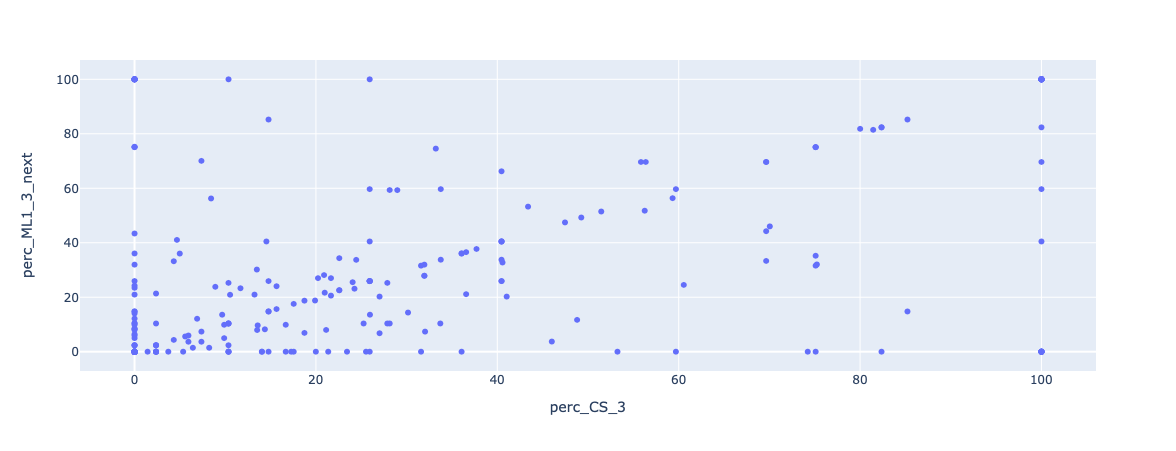

In [28]:
px.scatter(df_ipc,x="perc_CS_3",y="perc_ML1_3_next",width=500,height=450)

In [55]:
#calculate increase in ml1 compared to ml2 in percentage
df_ipc[f"ML1_i"]=((df_ipc[[f"ML1_{i}" for i in range(3,6)]].sum(axis=1)-df_ipc[[f"CS_{i}" for i in range(3,6)]].sum(axis=1))*100/df_ipc[[f"CS_{i}" for i in range(3,6)]].sum(axis=1)).replace(np.inf,0).replace(np.nan,0)
df_ipc[f"ML1_i2"]=((df_ipc[[f"ML1_{i}" for i in range(3,6)]].sum(axis=1)-df_ipc[[f"CS_{i}" for i in range(3,6)]].sum(axis=1))*100/df_ipc["pop_CS"])#.replace(np.inf,0).replace(np.nan,0)

In [60]:
df_nat2=df_ipc[["date","ML1_i","ML1_i2"]].groupby("date",as_index=False).mean()

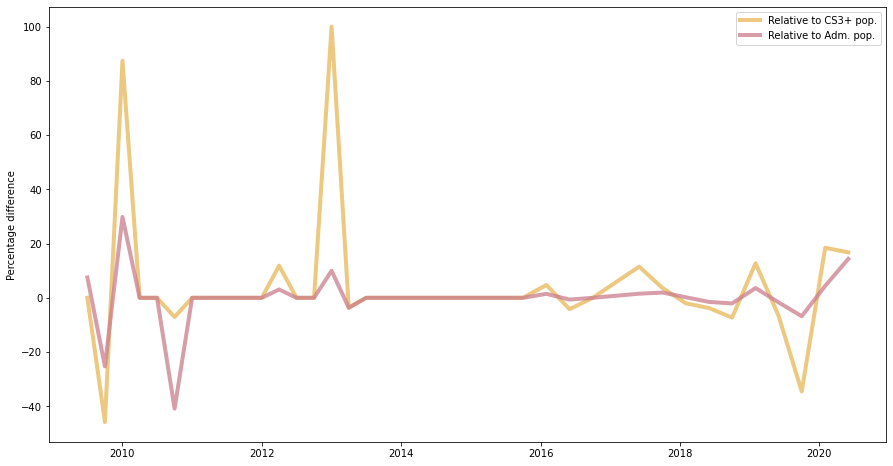

In [63]:
plt.figure(figsize=(15, 8))

plt.ticklabel_format(style='plain', axis='y')

plt.plot(df_nat2['date'], df_nat2['ML1_i'], label='Relative to CS3+ pop.',
                 alpha=0.75, color='#E6B655', linestyle='-', linewidth=4)
# plt.plot(df_nat['date'], df_nat['ML1_3_next'], color='#E6B655',
#                  label='Projected', linestyle=':', linewidth=2)
# plt.plot(df_nat['date'], df_nat['ML2_3_next2'], color='#E6B655',
#                  label='Projected', linestyle='-.', linewidth=2)
plt.plot(df_nat2['date'], df_nat2['ML1_i2'], label='Relative to Adm. pop.',
                 alpha=0.75, color='#CA7E8D', linestyle='-', linewidth=4)
# plt.plot(df_nat['date'], df_nat['ML1_4_next'], color='#CA7E8D',
#                  label='Projected', linestyle=':', linewidth=2)
# plt.plot(somalia_ipc['period'], somalia_ipc['IPC5-pop'], label='IPC 5',
#                  alpha=0.75, color='#9E6B55', linestyle='-', linewidth=4)
# plt.plot(somalia_ipc['P-end-period'], somalia_ipc['P-IPC5-pop'], color='#9E6B55',
#                  label='Projected', linestyle=':', linewidth=2)
plt.ylabel("Percentage difference")
# plt.title("Population at each IPC Phase and Threshold Trigger in Somalia")
plt.legend()
# for d in threshold['period']:
#         plt.axvline(d, linewidth=3, linestyle='-.', color='brown', alpha=0.75)





In [70]:
df_ipc["CS_3p"]=df_ipc[[f"CS_{i}" for i in range(3,6)]].sum(axis=1)

In [71]:
df_ipc["ML1_3p"]=df_ipc[[f"ML1_{i}" for i in range(3,6)]].sum(axis=1)

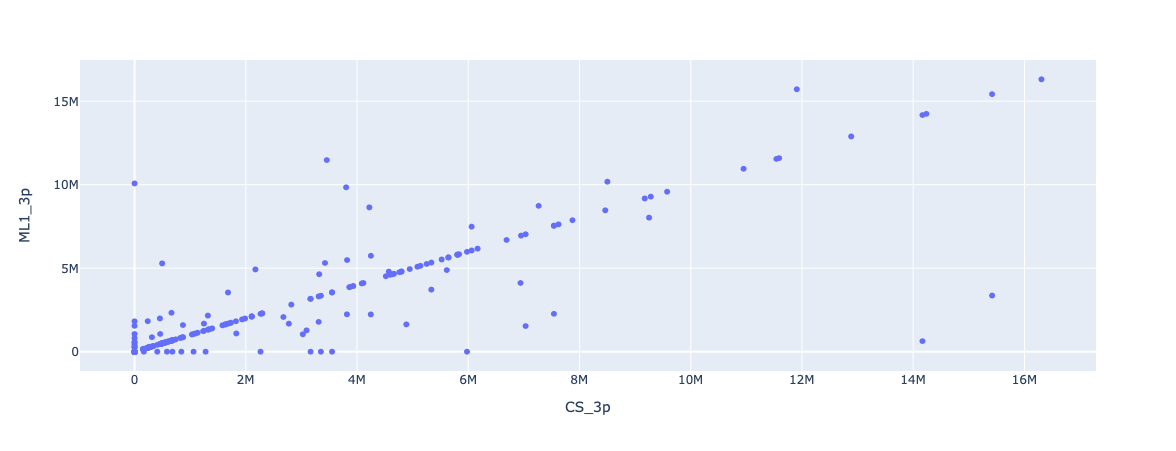

In [72]:
px.scatter(df_ipc,x="CS_3p",y="ML1_3p")

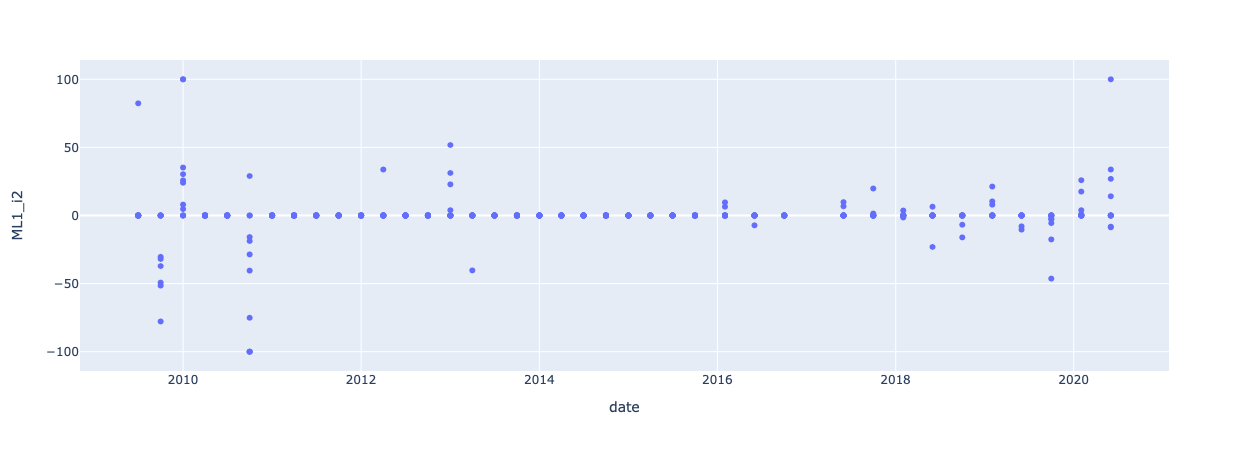

In [76]:
px.scatter(df_ipc,x="date",y="ML1_i2")

### Global IPC

In [37]:
#this is an edited file with solely the admin1 regions and edited column names
df_ipcp=pd.read_csv("Data/GlobalIPC_Ethiopia_Admin1.csv",delimiter=";",thousands=".")

In [48]:
df_ipcp.rename(columns={"Date of Analysis":"date","ADMIN1":"ADM1_EN","Country Population":"adjusted_population"},inplace=True)

In [49]:
df_ipcp["date"]=pd.to_datetime(df_ipcp["date"],format="%b/%y")

In [50]:
df_ipcp=df_ipcp.replace('%','', regex=True)

In [51]:
df_ipcp.columns

Index(['ADM1_EN', 'date', 'adjusted_population', 'pop_CS', 'CS_1', 'CS_1_perc',
       'CS_2', 'CS_2_perc', 'CS_3', 'CS_3_perc', 'CS_4', 'CS_4_perc', 'CS_5',
       'CS_5_perc', 'pop_ML1', 'ML1_1', 'ML1_1_perc', 'ML1_2', 'ML1_2_perc',
       'ML1_3', 'ML1_3_perc', 'ML1_4', 'ML1_4_perc', 'ML1_5', 'ML1_5_perc',
       'pop_ML2', 'ML2_1', 'ML2_1_perc', 'ML2_2', 'ML2_2_perc', 'ML2_3',
       'ML2_3_perc', 'ML2_4', 'ML2_4_perc', 'ML2_5', 'ML2_5_perc', 'CS_12'],
      dtype='object')

In [52]:
#convert to ints
df_ipcp.loc[:, ~df_ipcp.columns.isin(["ADM1_EN","date","Analysis Period"])]=df_ipcp.loc[:, ~df_ipcp.columns.isin(["ADM1_EN","date","Analysis Period"])].astype(int)

In [53]:
df_ipcp["CS_12"]=df_ipcp["CS_1"]+df_ipcp["CS_2"]

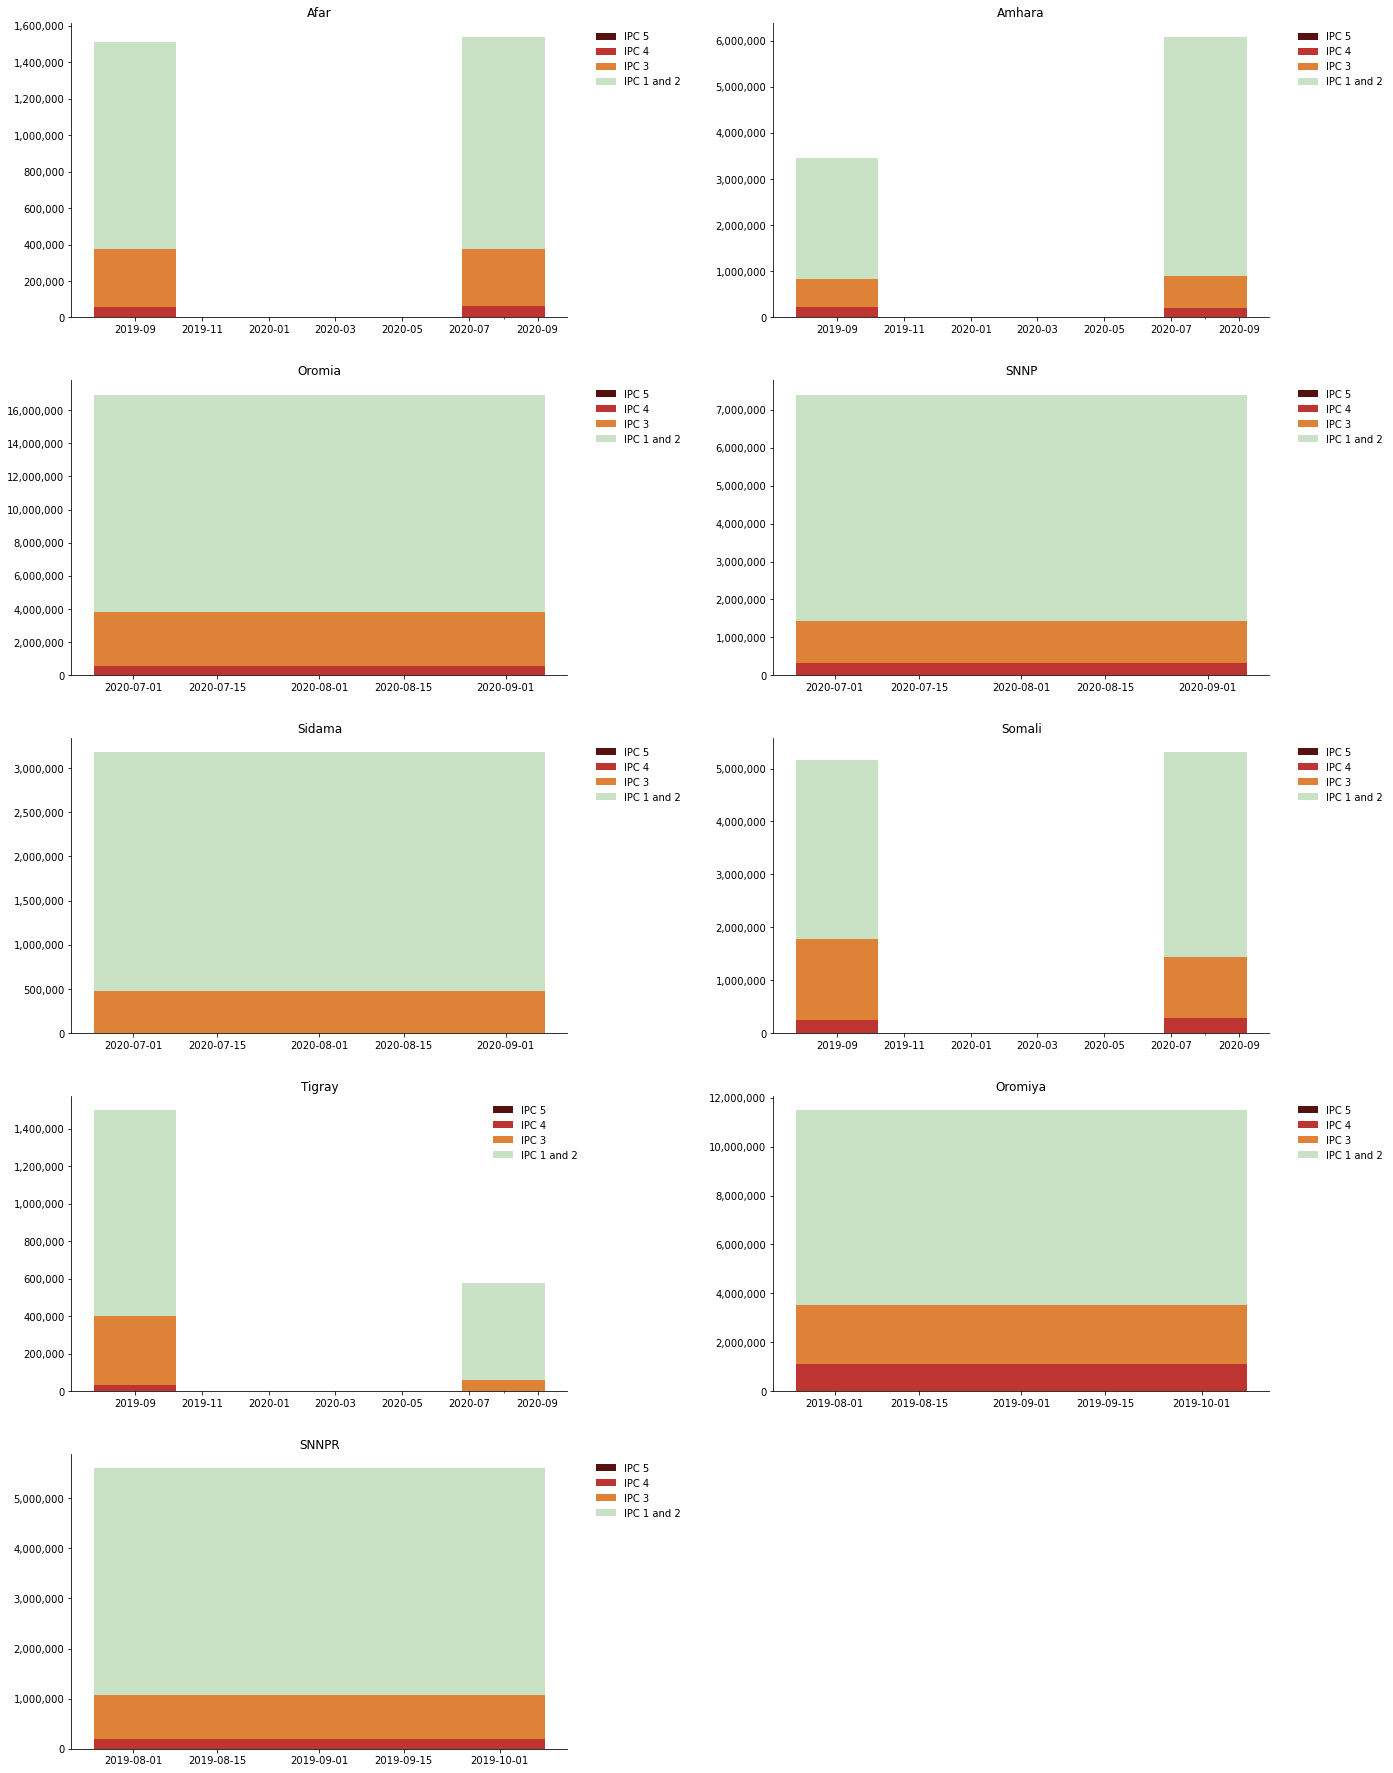

In [54]:
plot_ipclevels(df_ipcp)

### Ideas
- Ipc level map with percentages

### Old stuff

In [29]:
# #plot ipc level graphs with plotly. Super nice, but not getting legend right + mainly advantage in notebook, not when exporting
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# # data=df_ipc[df_ipc.ADM1_EN=="Oromia"]
# colp_num=2
# num_adm=len(df_ipc.ADM1_EN.unique())
# rows=num_adm // colp_num
# rows+=num_adm % colp_num
# fig = make_subplots(
#     rows=rows, cols=colp_num,subplot_titles=list(df_ipc.ADM1_EN.unique()),vertical_spacing=0.05)
# for k,a in enumerate(df_ipc.ADM1_EN.unique()):
#     col = k%colp_num + 1
#     row = int(str((k/colp_num) + 1)[0])
# #     print(k)
#     data=df_ipc[df_ipc.ADM1_EN==a]
#     CS_list=[]
#     color_map = {1:'#C9E1C5', 2:'#F2E65D', 3:'#DD8236', 4:'#BD3430', 5:'#551010', 99: '#CCCCCC'}
#     for i in range(5,0,-1):
#         fig.add_trace(go.Bar(name=f'CS_{i}',x=data["date"],y=data[f"CS_{i}"],marker_color=color_map[i]),row=row,col=col)
#     fig.add_trace(go.Scatter(x=data['date'], y=data['adjusted_population']/10,line=dict(
#                     color='Red'),name="10%"),row=row,col=col)
#     fig.add_trace(go.Scatter(x=data['date'], y=data['adjusted_population']/5,line=dict(
#                     color='black'),name="20%"),row=row,col=col)
# #     fig.add_trace(data=CS_list,row=k,col=1)
# # Change the bar mode
# fig.update_layout(barmode='stack',width=1000,height=3000)
# fig.show()

In [30]:
# #plot ipc level graphs with plotly. Super nice, but not getting legend right + mainly advantage in notebook, not when exporting
# data=df_ipc[df_ipc.ADM1_EN=="Oromia"]
# CS_list=[]
# color_map = {1:'#C9E1C5', 2:'#F2E65D', 3:'#DD8236', 4:'#BD3430', 5:'#551010', 99: '#CCCCCC'}
# for i in range(5,0,-1):
#     CS_list.append(go.Bar(name=f'CS_{i}',x=data["date"],y=data[f"CS_{i}"],marker_color=color_map[i]))
# CS_list.append(go.Scatter(x=data['date'], y=data['adjusted_population']/10,line=dict(
#                 color='Red'),name="10%"))
# CS_list.append(go.Scatter(x=data['date'], y=data['adjusted_population']/5,line=dict(
#                 color='black'),name="20%"))
# fig = go.Figure(data=CS_list)
# # Change the bar mode
# fig.update_layout(barmode='stack')
# fig.show()

In [31]:
# #select only most current dates
# df_sel=df_ipc[df_ipc.date.isin(["2020-06","2019-10"])].sort_values(["date","ADM1_EN"])[["date","ADM1_EN"]+[f"pop_{s}" for s in ["CS","ML1","ML2"]]+[f"CS_{i}" for i in range(1,6)]+[f"ML1_{i}" for i in range(1,6)]+[f"ML2_{i}" for i in range(1,6)]+[f"perc_CS_{i}" for i in range(1,6)]+[f"perc_ML1_{i}" for i in range(1,6)]+[f"perc_ML2_{i}" for i in range(1,6)]]
# # df_sel.to_excel("Data/FewsNet_ethiopia_current.xlsx")

In [32]:
# # possible neater way to select date for which ML1 was made, but needs finishing
# def get_projection(row, df,col,adm2c="ADM2_EN",adm1c="ADM1_EN"):
# #     print(row)
#     possible_dates=[row["date"] - pd.DateOffset(months=m) for m in [2,3,4]]
# #     print(possible_dates)
#     try:
# #         act=df[df["date"].isin(possible_dates)]
# #         print(act.columns)
#         actual = df.loc[(df[adm1col]==row[adm1col])&(df[adm2c]==row[adm2c])&(df['date']).isin(possible_dates)]
#         return actual[col].values[0]
#     except:
#         return None

In [33]:
# import plotly.express as px

In [34]:
# df_ysm3=df_nat.melt(id_vars=["date"],value_name="population",value_vars=["CS_3", "ML1_3_next","ML2_3_next2"])                  

In [35]:
# df_ysm3

In [36]:
# #plot population of IPC3 for CS, ML1 and ML2
# fig=px.bar(df_ysm3,x="date",y="population",color="variable",barmode="group",height=600,width=1200) #,facet_row="year"
# # fig.update_xaxes(ticktext=["IPC2-","IPC3","IPC4","IPC5"],tickvals=["CS_2-_perc","CS_3_perc","CS_4_perc","CS_5_perc"])
# fig.show()